In [1]:
name = '2016-05-13-custom-colorbar-colormap'
title = 'Customizing colorbars and colormaps in matplotlib'
tags = 'matplotlib, dataviz'
author = 'Denis Sergeev'

In [2]:
from nb_tools import connect_notebook_to_post
from IPython.core.display import HTML

html = connect_notebook_to_post(name, title, tags, author)

Today's meeting started with a question.

>I have a colorbar such as this:
>![](../figures/help1.JPG)

>How can I get a colorbar to look like in the figure below?

>![](../figures/help2.JPG)

### 0. some necessary imports and fake data

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [4]:
%matplotlib inline

In [5]:
mpl.rcParams['figure.figsize'] = (13,9) # change default figure size

We will start with the `colormap` used in the original question.

In [6]:
cmap1 = 'Blues'

In the absence of the data used in the given figure, we create a random array:

In [7]:
x = np.arange(0, np.pi, 0.1)
y = np.arange(0, 2*np.pi, 0.1)
xx, yy = np.meshgrid(x, y)
zz = np.clip(6*(np.cos(xx) * np.sin(yy) + np.random.rand(*xx.shape)*np.cos(yy)), 0, 5.5)

### 1. Customizing a colorbar

The first part of the problem is the `colorbar` appearance: colour steps, tick labels, etc. We use a `mpl.colorbar.ColorbarBase()` instance, because it allows us to show a `colorbar` without an actual mappable object.

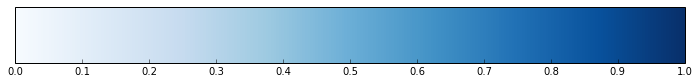

In [8]:
fig, ax = plt.subplots(figsize=(12, 1))
cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal', cmap=cmap1)

Thus we got a simple `colorbar` with smooth colour range for levels between 0 and 1.

Next, with a bunch of keywords we can achieve the desired appearance.

In [9]:
col_levels = np.arange(0,6.5,0.5) # sequence from 0 to 6 with step 0.5
tick_loc = np.arange(0,7,1) # sequence from 0 to 6 with step 1
fmt = '%1.2f' # tick labels format with two decimal places

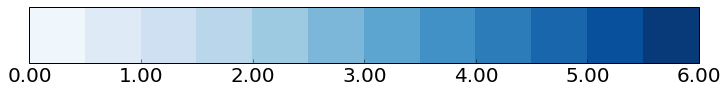

In [10]:
fig, ax = plt.subplots(figsize=(12, 1))
cb = mpl.colorbar.ColorbarBase(ax, cmap=cmap1,
                               boundaries=col_levels,
                               ticks=tick_loc,
                               format=fmt,
                               orientation='horizontal')
cb.ax.tick_params(labelsize=20)

Now, to apply these settings to a data plot, we use a method `colorbar()` instead of the base colorbar class. We also put colour levels and colour map name in the `contourf()`. Other keywords are passed as before, but let's pack them into a dictinary.

In [11]:
cbkw = dict(ticks=tick_loc, format=fmt, orientation='vertical')

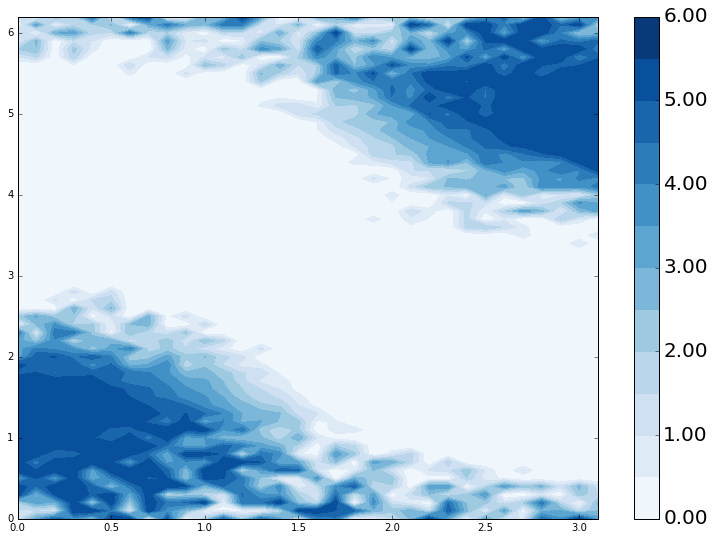

In [12]:
fig, ax = plt.subplots()
p = ax.contourf(x, y, zz, cmap=cmap1, levels=col_levels)
cb1 = fig.colorbar(p, ax=ax, **cbkw)
cb1.ax.tick_params(labelsize=20)

We will use this plot for other examples below, so let's make a function of it.

In [13]:
def myplot(cmap=cmap1):
    """Test a colormap on random data with other params being the same"""
    fig, ax = plt.subplots()
    p = ax.contourf(x, y, zz, cmap=cmap, levels=col_levels)
    cb1 = fig.colorbar(p, ax=ax, **cbkw)
    cb1.ax.tick_params(labelsize=20)

### 1.2 Colour map

The second part of the question is about a colours sequence used to present the data, i.e. the choice of the `colormap`.

Let's check if the `colormap` is available here: http://matplotlib.org/examples/color/colormaps_reference.html

Yes, luckily, it is available under the name **`'gist_stern'`**. We will add **`'_r'`** at the end to reverse it. Check it out!

In [14]:
cmap2 = 'gist_stern_r'

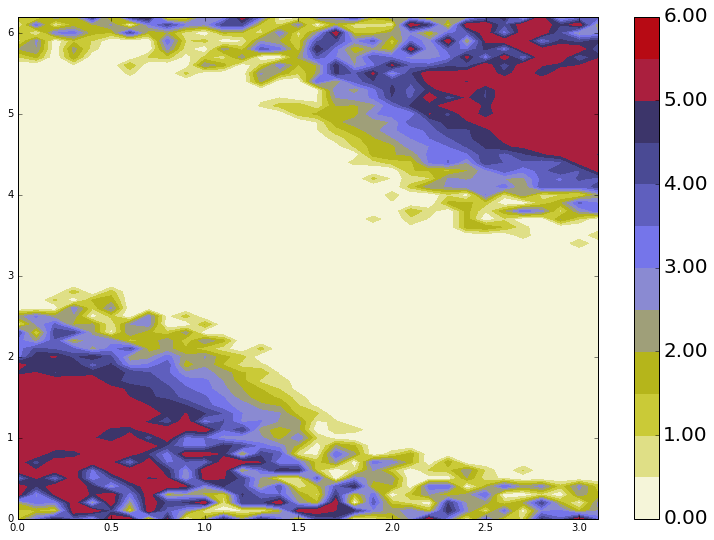

In [15]:
myplot(cmap2)

### 1.2.1 Creating your own `colormap`

But what if you want to customize the `colormap` or even create your own one? There are several ways to do this. Below are some of the easiest examples.

### 1.2.1.1 `colormap` from a list of colors

The simplest way is to use a sequence of colours. As you can see, any form of colour is valid here, whether it's letter, hex, tuple of RGB values, white/black ratio or just a name.

In [16]:
super_random_color_sequence = ['r', (0,0,1), '0.2', 'yellow', '#0044AB']
cmap3 = mpl.colors.ListedColormap(super_random_color_sequence)

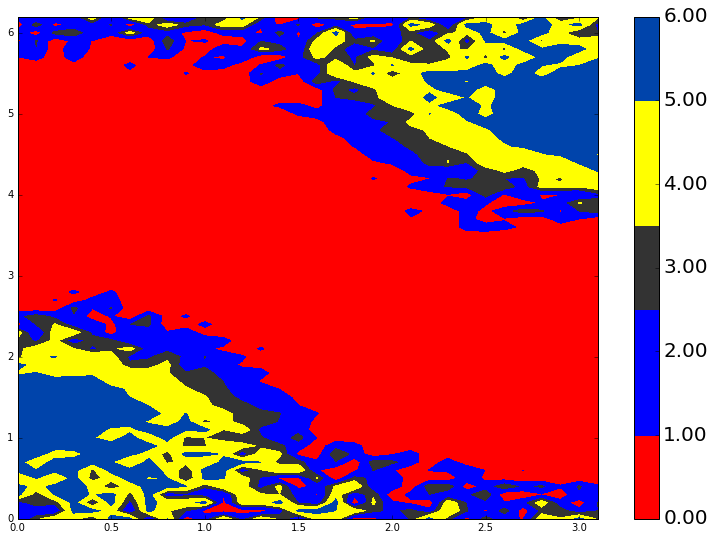

In [17]:
myplot(cmap3)

### 1.2.3 `LinearSegmentedColormap`

Another way is to use `LinearSegmentedColormap()` instance, specifically it's method of generating a `colormap` from a list of colours. The advantage here is that the resulting `colormap` is evenly transitions between given colours.

For this example we also use a trick to create a transparent colour. This can be useful for showing several layers of data simultaneously.

In [18]:
c_white_trans = mpl.colors.colorConverter.to_rgba('w', alpha=0.0)
cmap4 = mpl.colors.LinearSegmentedColormap.from_list('some_name_for_this_cmap',
                                                    [c_white_trans, '#770000', 'red', 'yellow'], 64)

To demonstrate the colour transparency we overlay two plots:

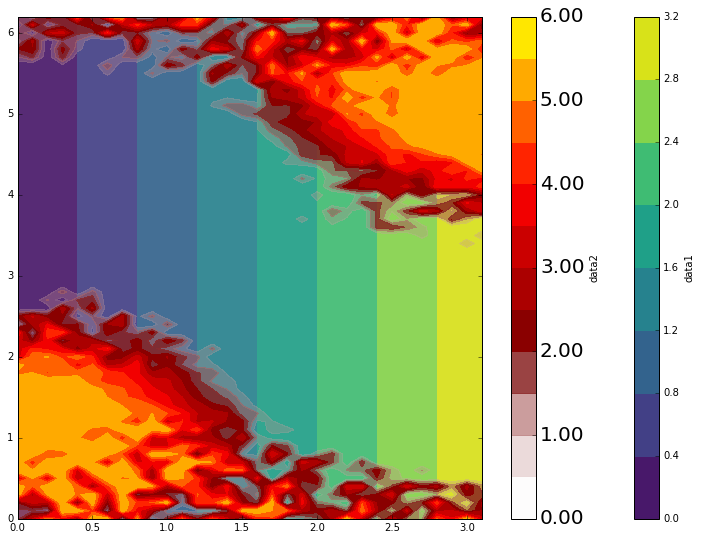

In [19]:
fig, ax = plt.subplots()
# First plot
p1 = ax.contourf(x, y, xx, cmap='viridis')
cb1 = fig.colorbar(p1, ax=ax, orientation='vertical', label='data1', pad=0.05)
# Second plot
p2 = ax.contourf(x, y, zz, cmap=cmap4, levels=col_levels)
cb2 = fig.colorbar(p2, ax=ax, label='data2', **cbkw)
cb2.ax.tick_params(labelsize=20)

### 1.2.4 And kids, remember to avoid the rainbow or jet colormaps!

In [20]:
import seaborn as sns
try:
    sns.color_palette('jet')
except ValueError as e:
    print(e)

No.


## Further reading

* http://matplotlib.org/examples/api/colorbar_only.html
* http://matplotlib.org/examples/pylab_examples/custom_cmap.html
* https://wxster.com/blog/2015/12/using-two-filled-contour-plots-simultaneously-in-matplotlib

In [21]:
HTML(html)